In [0]:
# CARREGA BIBLIOTECAS
import numpy as np
import pandas as pd

# VERIFICA A VERSÃO DO PANDAS
pd.__version__

'0.25.2'

In [0]:
# CARREGA BASE DO TITANIC
# ----------------------------------------------------------------------------------------------------- #
# OBS.: O TRECHO DE CÓDIGO ABAIXO SÓ É NECESSÁRIO REALIZAR SE ESTIVER USANDO O AMBIENTE DO GOOGLE COLAB
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
arquivo_base = "/content/drive/My Drive/titanic.csv"
# ----------------------------------------------------------------------------------------------------- #

# arquivo_base = <caminho do arquivo>

# URL KAGGLE DA BASE: https://www.kaggle.com/c/titanic

# CARREGAR A BASE NO DATAFRAME
df = pd.read_csv(arquivo_base)

In [0]:
# ESPIAR O DADOS
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**CAMPOS (FEATURES)**
* **passengerid** = ID do passageiro do navio (código primário).
* **survived** = Se sobreviveu ao naufrágio estará como 1 e caso esteja com 0 (zero não sobreviveu.
* **pclass** = Tipo de classe de passagem (Do 1 ao 3), sendo 1 a melhor classe e 3 a pior classe.
* **name** = Nome do passageiro
* **sex** = Gênero do passageiro, sendo masculino e feminino.
* **age** = Idade do passageiro na data da ocorrência do naufrágio.
* **sibsp** = Número de irmãos / cônjuges a bordo.
* **parch** = Número de pais / filhos a bordo.
* **ticket** = Código do ticket.
* **fare** = Valor da passagem.
* **cabin** = Código de identificação da Cabine.
* **embarked** = Local ondem o passageiro embarcou no navio.

In [0]:
#  VERIFICAR TIPOS DE DADOS DE CADA FEATURE
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [0]:
# DESCREVER DADOS ESTATÍSTICOS (APENAS PARA FEATURES NUMÉRICAS)
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
# HEAD ...
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [0]:
# ... E TAIL
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [0]:
# EXTRAIR COLUNAS CATEGORICAS (dtype == "O" (object))
df[[c for c in df.columns if df[c].dtypes == "O"]]

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [0]:
# EXTRAIR COLUNAS NUMERICAS (dtype != "O" (object))
df[[c for c in df.columns if df[c].dtypes != "O"]]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [0]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# EXERCICIO

* **QUANTAS FEATURES NÚMERICAS DISCRETAS?**<br>4 (Pclass, Age, SibSp, Parch)
* **QUANTAS FEATURES NÚMERICAS CONTINUAS?**<br>1 (Fare)
* **QUANTAS FEATURES NÚMERICA BINÁRIAS (BOOLEAN)?**<br>1 (Survived)
* **QUANTAS FEATURES DICOTOMICOS?**<br>1 (Sex)

In [0]:
# PERCENTUAL DE ELEMENTOS NULOS
round(df.isnull().mean()*100,2)


PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

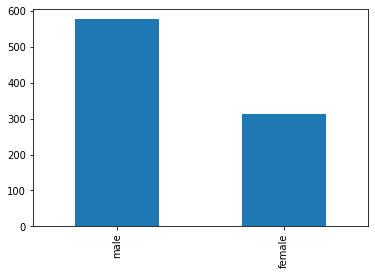

In [0]:
# QUANTIDADES DE PASSAGEIROS POR:
# SEXO (PLOT OS RESULTADOS (BAR))
df["Sex"].value_counts().plot(kind="bar")

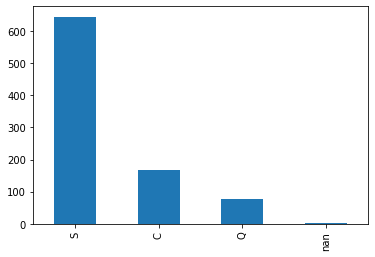

In [0]:
# EMBARQUE (PLOT OS RESULTADOS (BAR))
df["Embarked"].value_counts(dropna=False).plot(kind="bar")

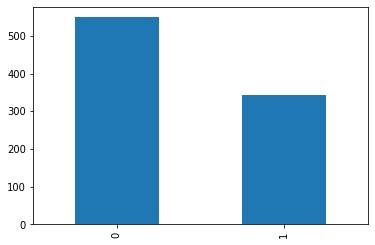

In [0]:
# SOBREVIVENCIA (PLOT OS RESULTADOS (BAR))
df["Survived"].value_counts(dropna=False).plot(kind="bar")

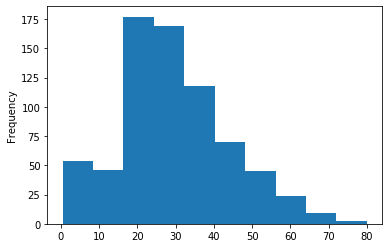

In [0]:
# COMO ESTÃO DISTRIBUIDOS AS IDADES:
# TOTAL (PLOT OS RESULTADOS (HIST))
df["Age"].plot(kind="hist")

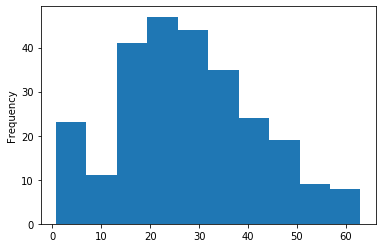

In [0]:
# SOMENTE MULHERES (PLOT OS RESULTADOS (HIST))
df_males = df[df["Sex"] == "female"]
df_males["Age"].plot(kind="hist")

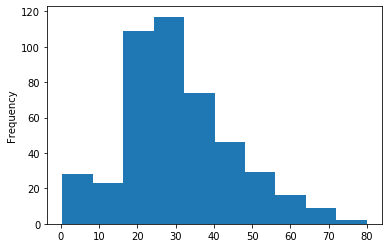

In [0]:
# SOMENTE HOMEMS (PLOT OS RESULTADOS (HIST))
df_males = df[df["Sex"] == "male"]
df_males["Age"].plot(kind="hist")

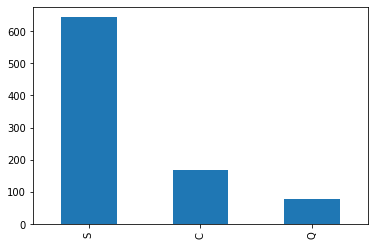

In [0]:
# LOCAIS DE EMBARQUE:
# TOTAL (PLOT OS RESULTADOS (BAR))
df["Embarked"].value_counts().plot(kind="bar")

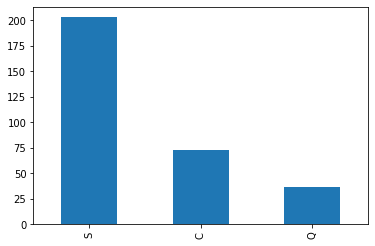

In [0]:
# SOMENTE MULHERES (PLOT OS RESULTADOS (BAR))
df_female = df[df["Sex"] == "female"]
df_female["Embarked"].value_counts().plot(kind="bar")

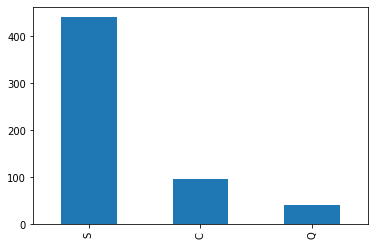

In [0]:
# SOMENTE MULHERES (PLOT OS RESULTADOS (BAR))
df_males = df[df["Sex"] == "male"]
df_males["Embarked"].value_counts().plot(kind="bar")

In [0]:
# TAXA DE SOBREVIVÊNCIA:
# TOTAL
df["Survived"].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [0]:
# SOMENTE HOMEMS
df[df["Sex"] == "male"]["Survived"].value_counts(normalize=True)

0    0.811092
1    0.188908
Name: Survived, dtype: float64

In [0]:
# SOMENTE MULHERES
df[df["Sex"] == "female"]["Survived"].value_counts(normalize=True)

1    0.742038
0    0.257962
Name: Survived, dtype: float64

In [0]:
# CRIE UMA FAIXA DE IDADE
# CRIANÇA: 0 - 14 ANOS
# ADOLESCENTE: 15 - 21 ANOS
# ADULTO: 22 A 60 ANOS
# IDOSO: +61 

bins = [0, 14, 21, 60, np.inf]
labels = ["crianca", "adolescente", "adulto", "idoso"]
df["faixa_etaria"] = pd.cut(df["Age"], bins, labels=labels)

# COLA: pd.cut(df[<col>], bins, labels)

In [0]:
df[["faixa_etaria", "Age"]].head(10)

,faixa_etaria,Age
0,adulto,22.0
1,adulto,38.0
2,adulto,26.0
3,adulto,35.0
4,adulto,35.0
5,NaN,NaN
6,adulto,54.0
7,crianca,2.0
8,adulto,27.0
9,crianca,14.0


In [0]:
# GOD MODE!!!
import pandas_profiling
pandas_profiling.ProfileReport(df)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,13
Number of observations,891
Total Missing (%),9.0%
Total size in memory,84.7 KiB
Average record size in memory,97.4 B
Numeric,6
Categorical,5
Boolean,1
Date,0
Text (Unique),1
Rejected,0


In [0]:
# CONTINUE AS ANÁLISES...

Referência:<br>
https://medium.com/@alegeorgelustosa/an%C3%A1lise-explorat%C3%B3ria-e-preditiva-do-dataset-titanic-em-python-fbd5e5bb7328